In [4]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             765 non-null    float64
 4   Insulin                   764 non-null    float64
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


<AxesSubplot: >

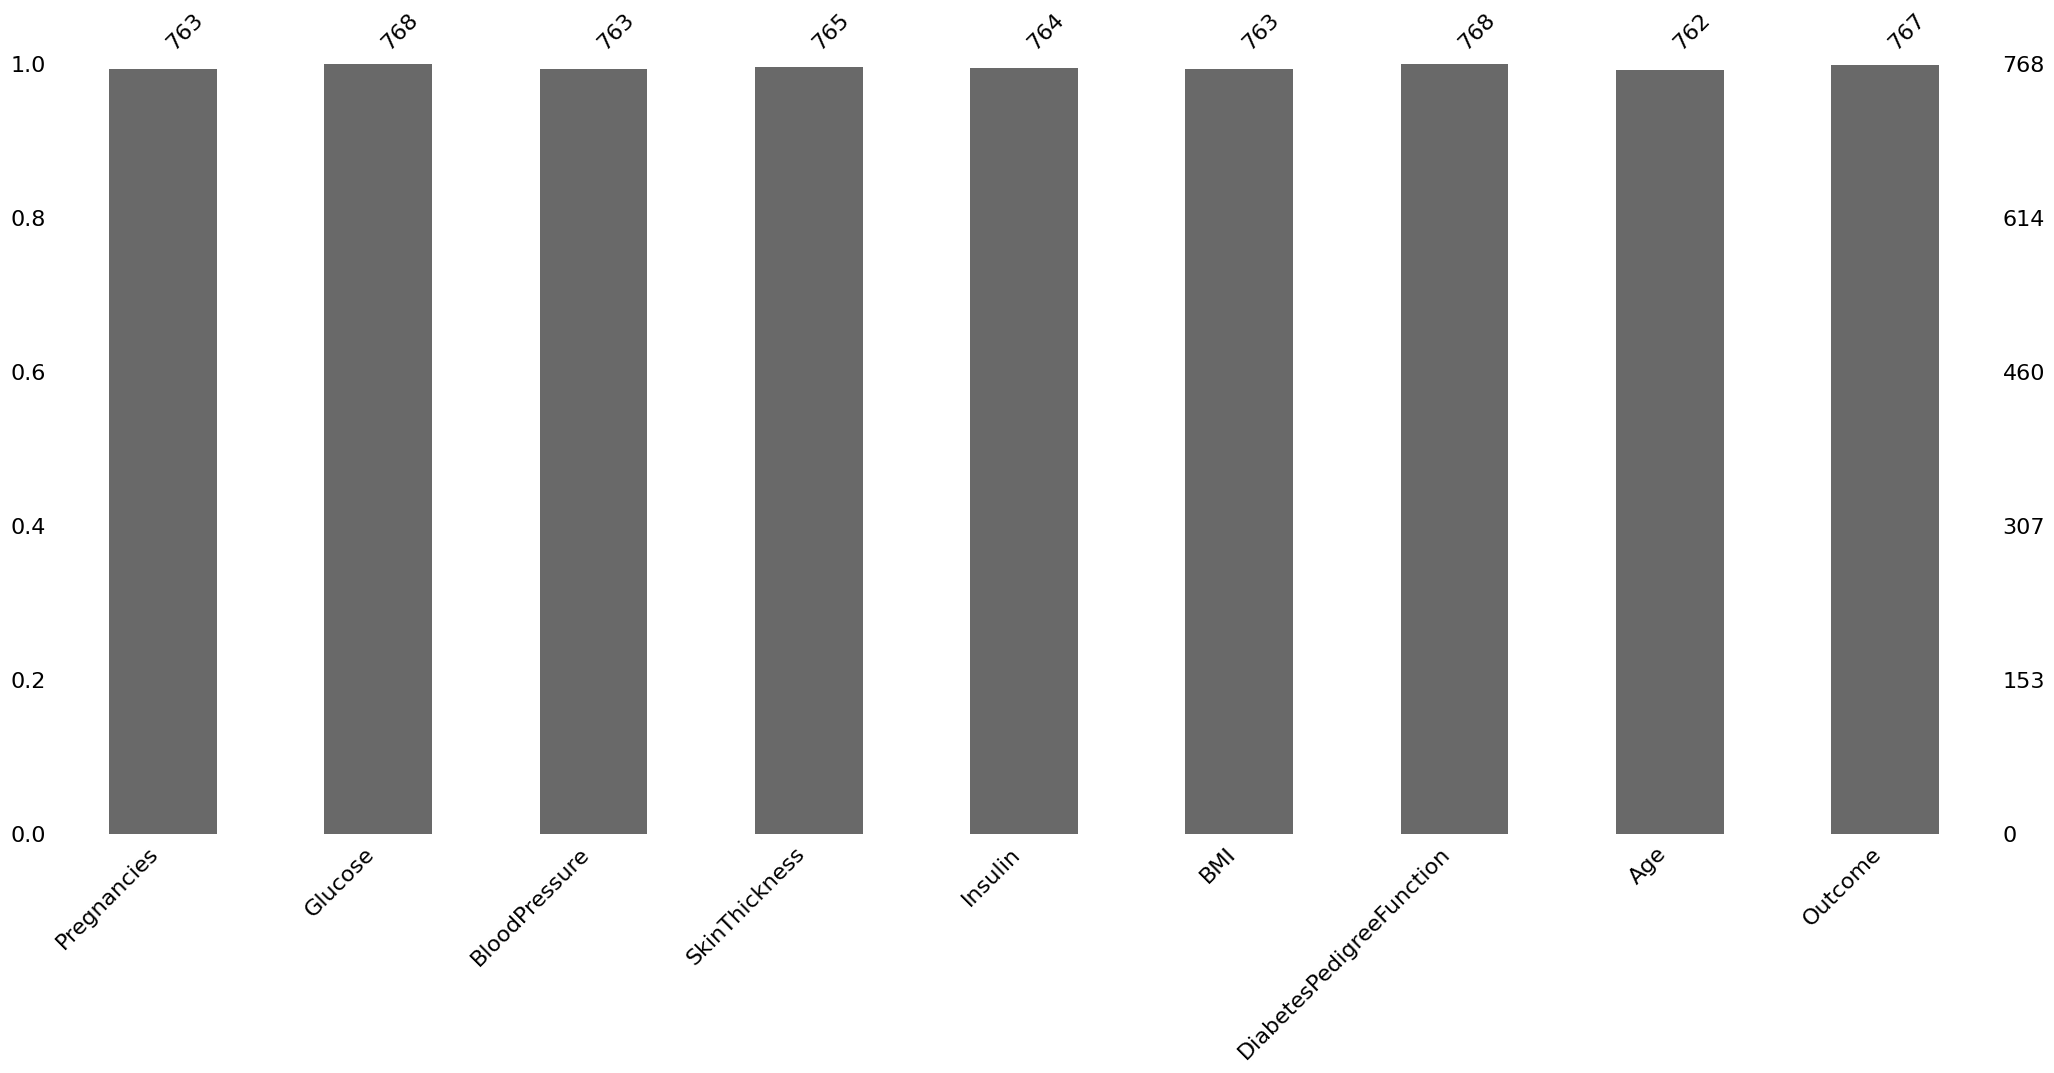

In [8]:
msno.bar(data)

In [11]:
data.dropna(subset=['Age'], axis = 0, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               760 non-null    float64
 1   Glucose                   762 non-null    int64  
 2   BloodPressure             757 non-null    float64
 3   SkinThickness             759 non-null    float64
 4   Insulin                   758 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   761 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.5 KB


In [14]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               760 non-null    float64
 1   Glucose                   757 non-null    float64
 2   BloodPressure             726 non-null    float64
 3   SkinThickness             535 non-null    float64
 4   Insulin                   389 non-null    float64
 5   BMI                       746 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   761 non-null    float64
dtypes: float64(9)
memory usage: 59.5 KB


<AxesSubplot: xlabel='BloodPressure'>

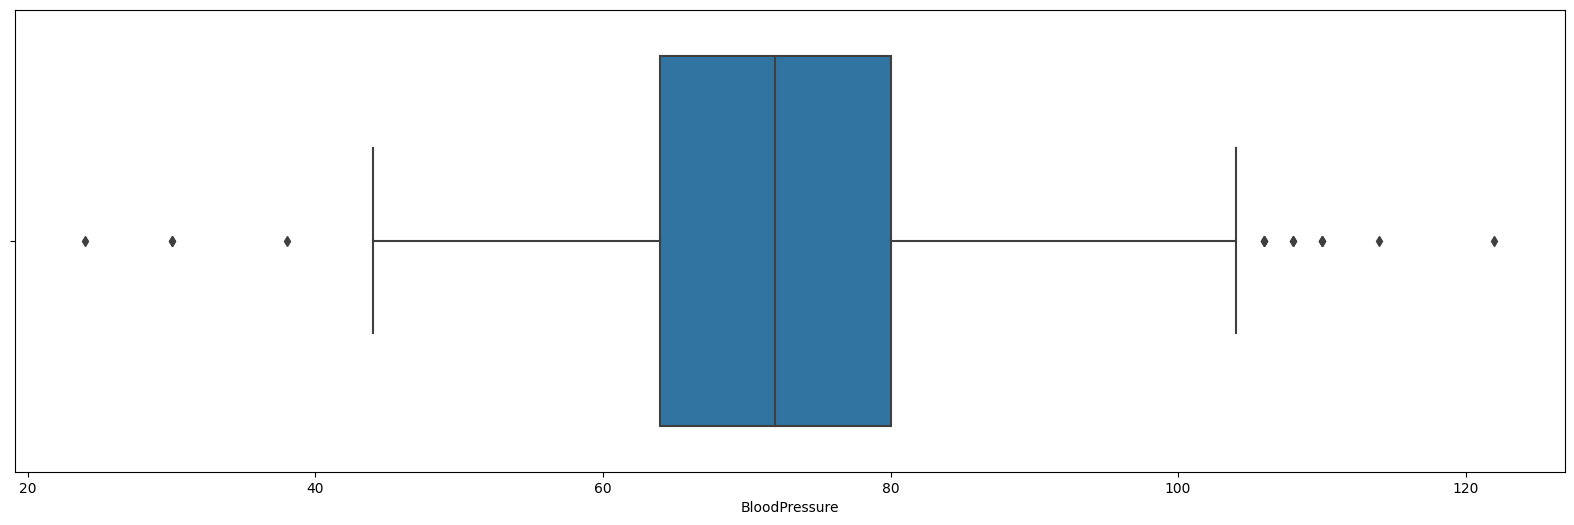

In [18]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = data['BloodPressure'])

In [25]:
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)

<AxesSubplot: xlabel='Glucose'>

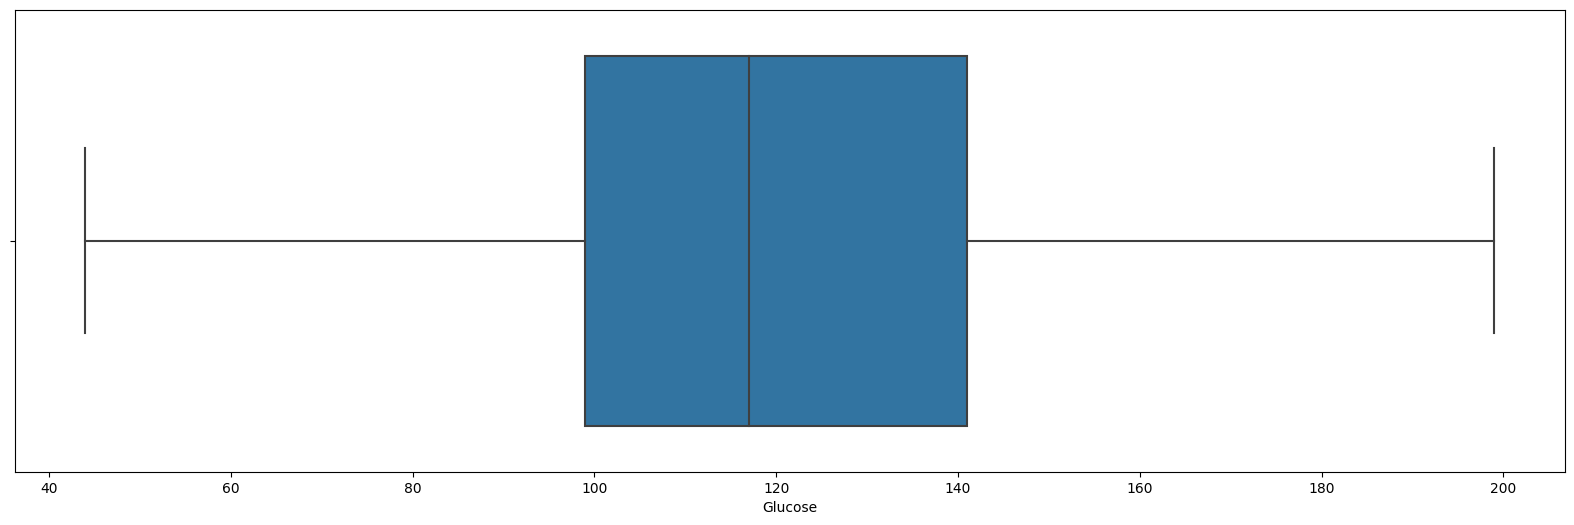

In [26]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = data['Glucose'])

In [27]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)

<AxesSubplot: xlabel='SkinThickness'>

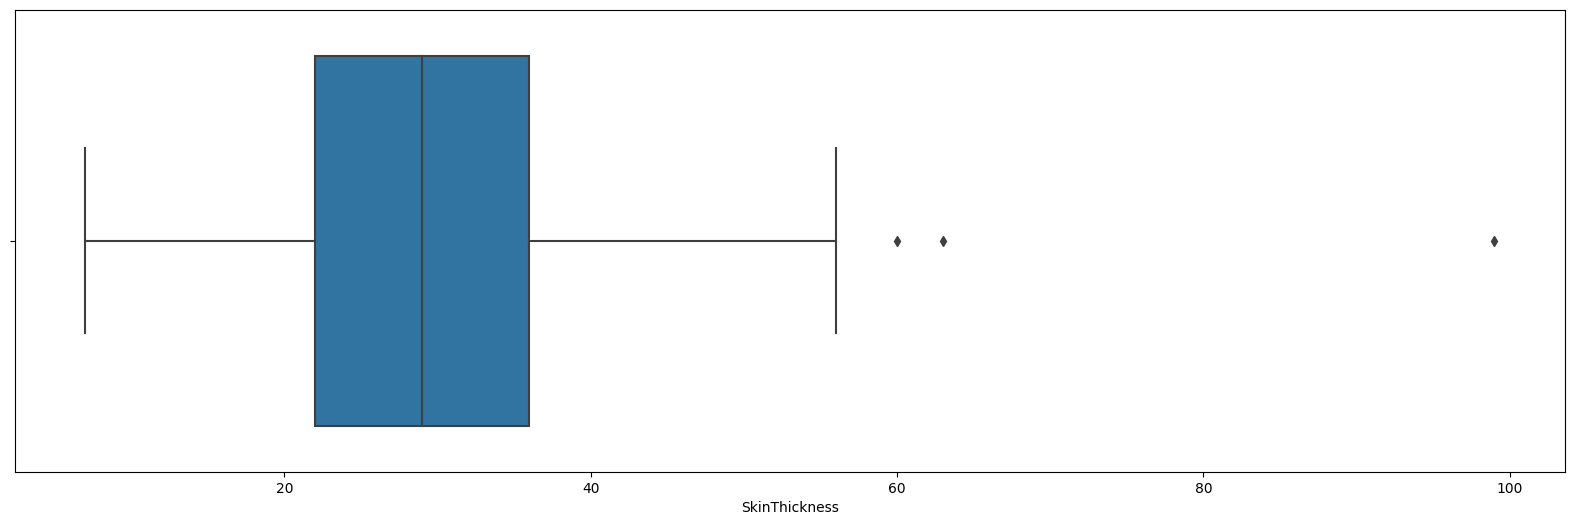

In [19]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = data['SkinThickness'])

In [28]:
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)

<AxesSubplot: xlabel='BMI'>

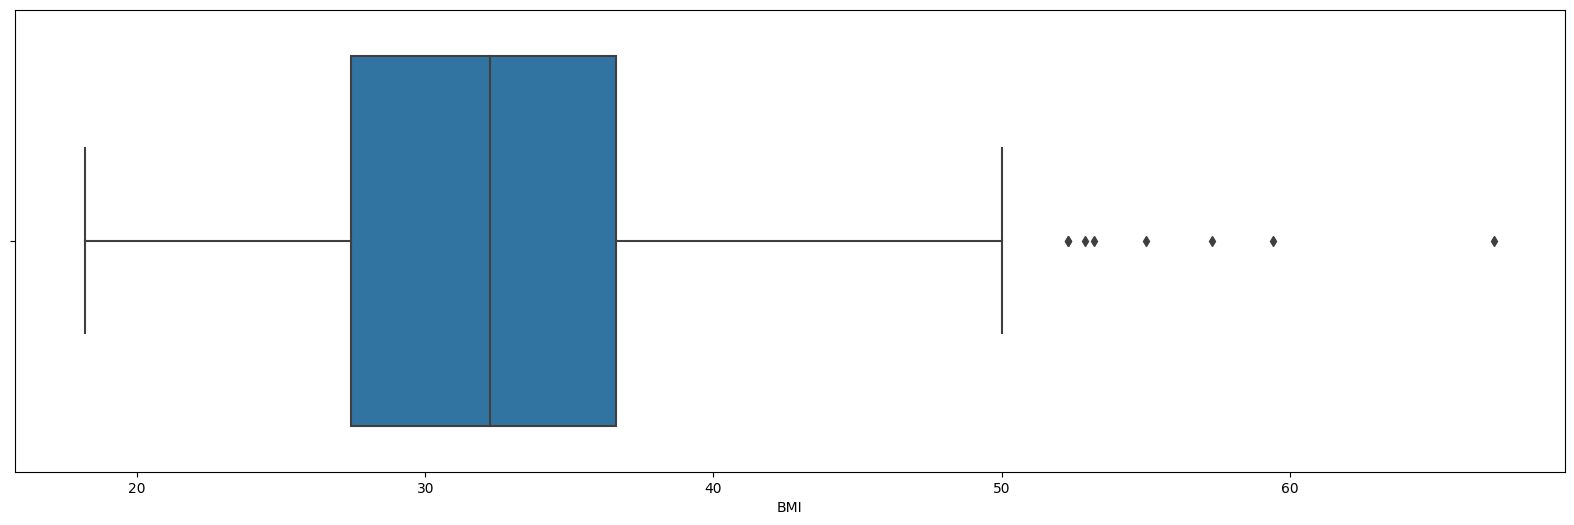

In [20]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = data['BMI'])

In [29]:
data['BMI'].fillna(data['BMI'].median(), inplace=True)

<AxesSubplot: xlabel='Insulin'>

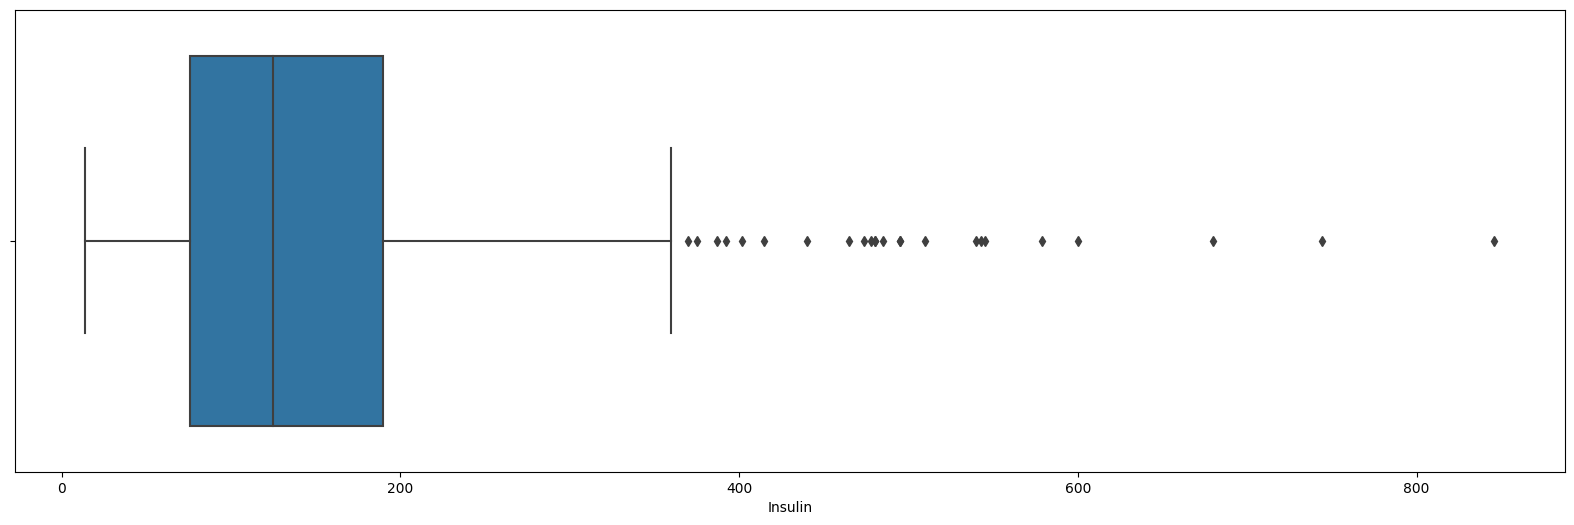

In [21]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = data['Insulin'])

In [30]:
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)

<AxesSubplot: xlabel='Pregnancies'>

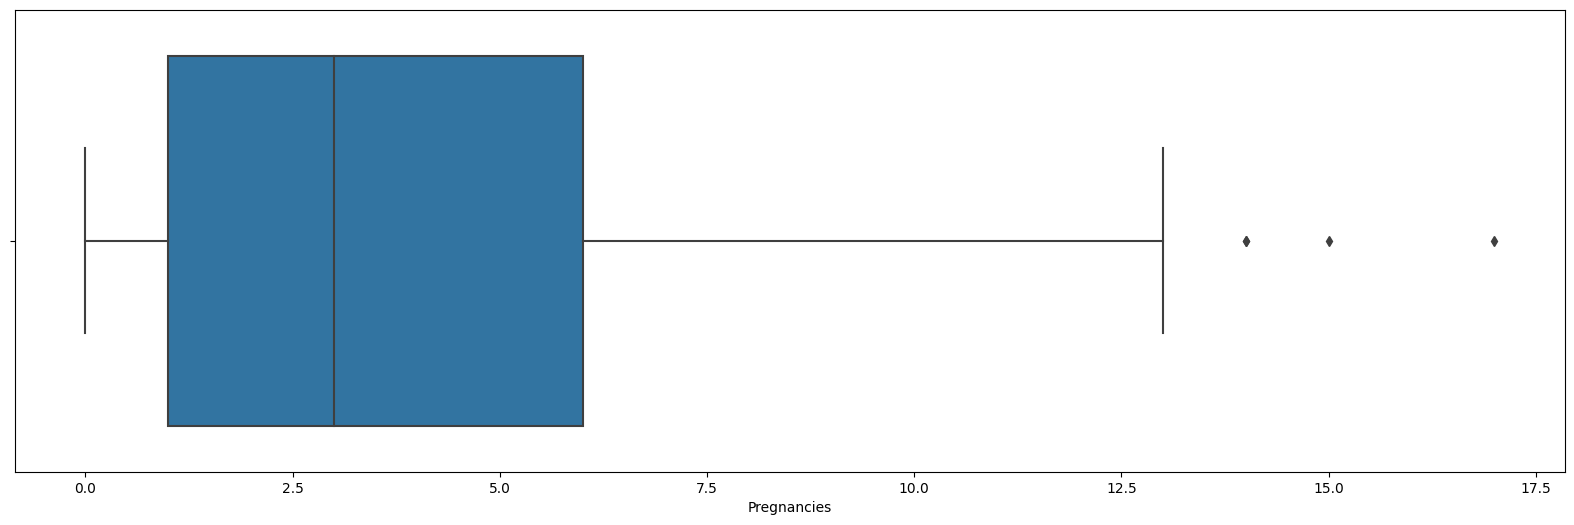

In [23]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = data['Pregnancies'])

In [31]:
data['Pregnancies'].fillna(data['Pregnancies'].median(), inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               762 non-null    float64
 1   Glucose                   762 non-null    float64
 2   BloodPressure             762 non-null    float64
 3   SkinThickness             762 non-null    float64
 4   Insulin                   762 non-null    float64
 5   BMI                       762 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   761 non-null    float64
dtypes: float64(9)
memory usage: 59.5 KB


In [33]:
data.dropna(inplace=True)

array([[<AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>],
       [<AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'Pregnancies'}>]], dtype=object)

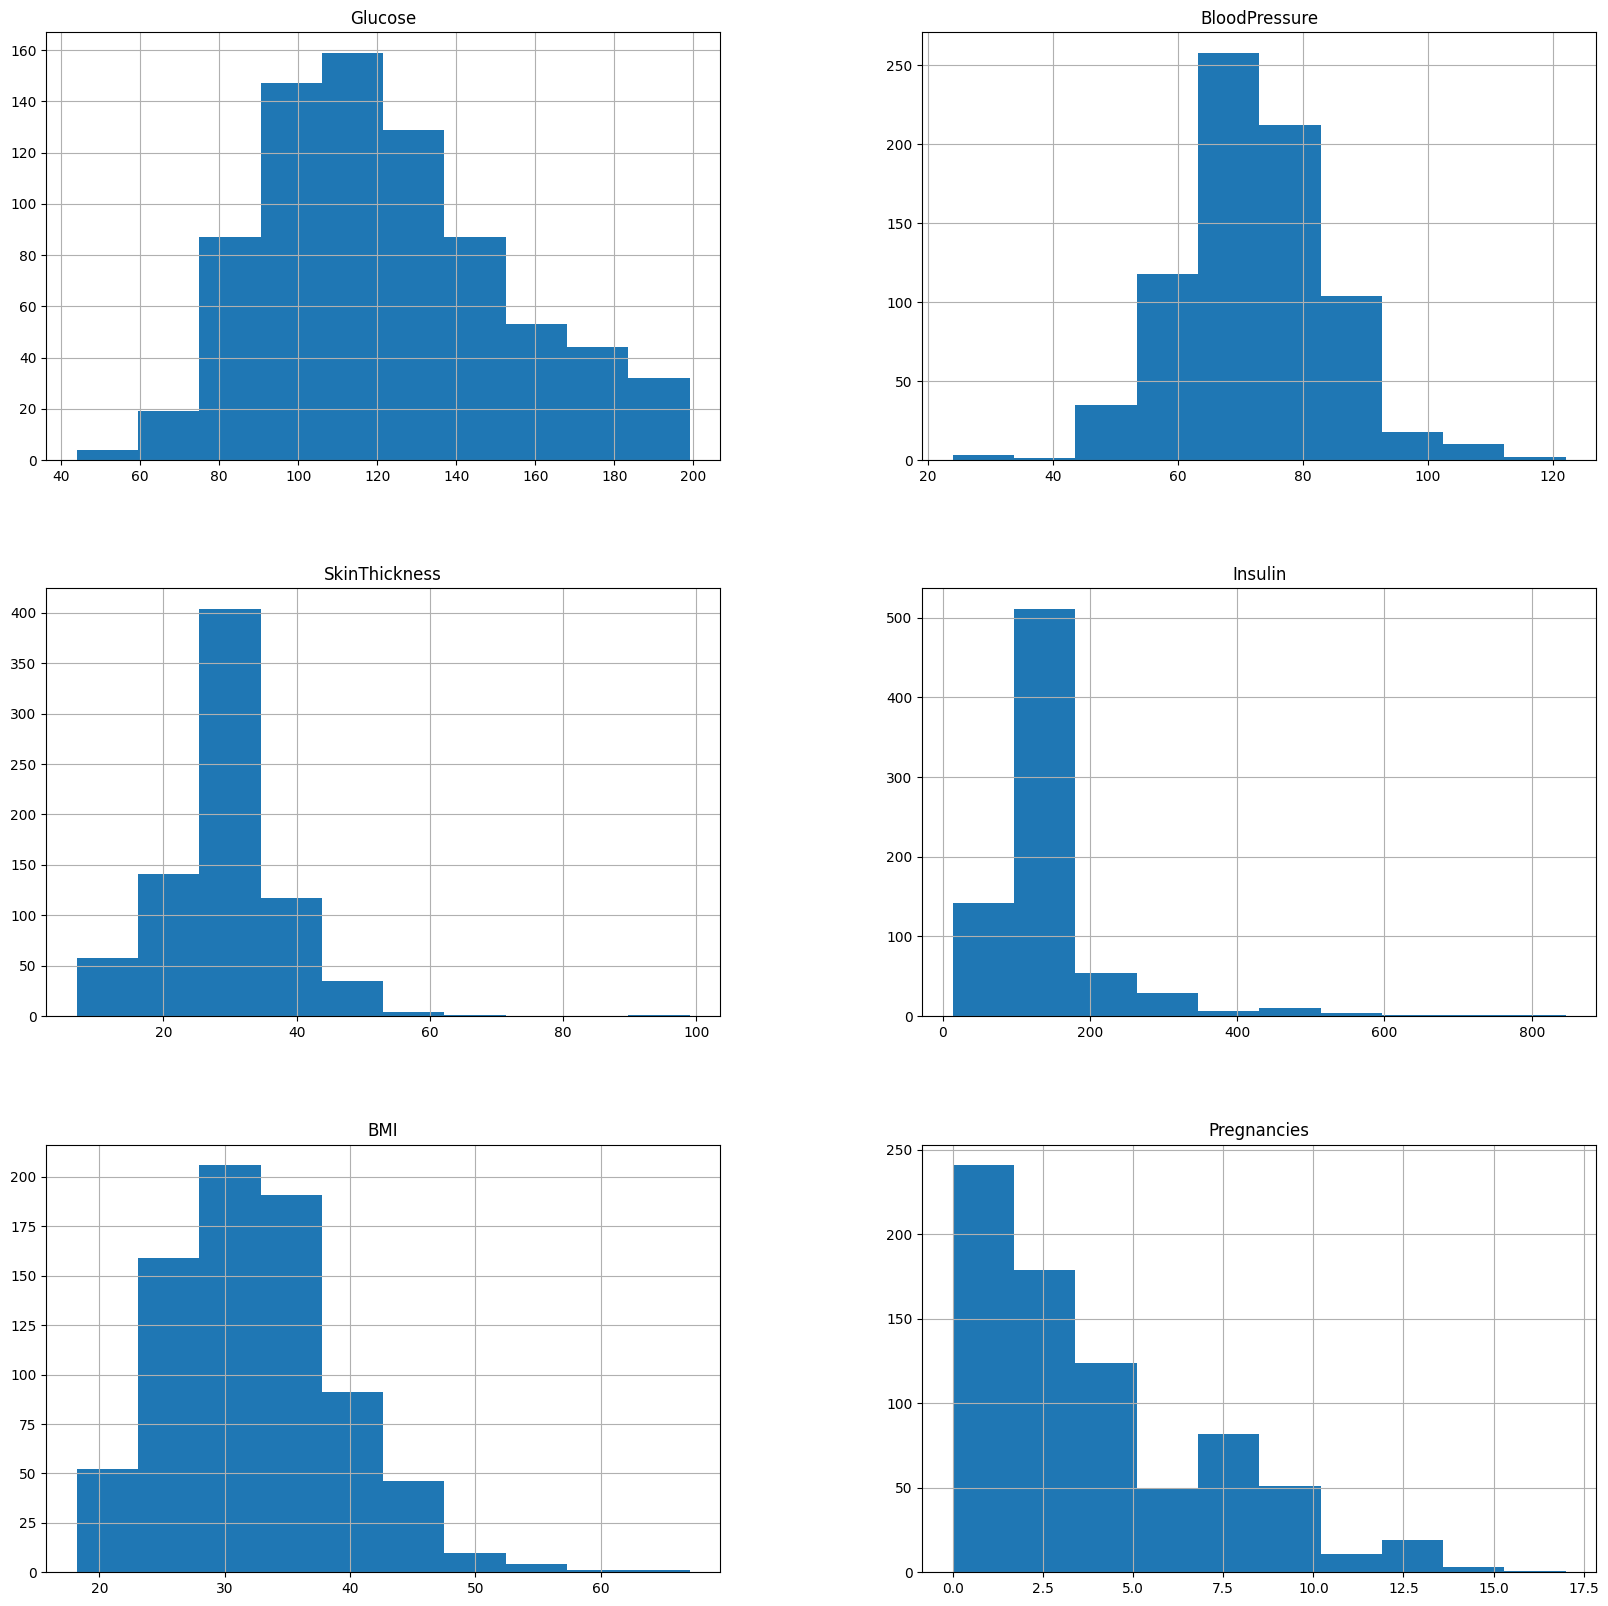

In [37]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pregnancies']].hist(figsize=(20, 20))

In [38]:
sc = StandardScaler()

In [39]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
new_data = sc.fit_transform(data.drop(columns = ['Outcome']))
df = pd.DataFrame(new_data, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [42]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.637200,0.862128,-0.036891,0.671910,-0.180860,0.169398,0.480763,1.421694
1,-0.849339,-1.203732,-0.533905,-0.011221,-0.180860,-0.850764,-0.366726,-0.191322
2,1.231815,2.009828,-0.699576,-0.011221,-0.180860,-1.331697,0.618940,-0.106426
3,-0.849339,-1.072567,-0.533905,-0.694352,-0.538712,-0.632158,-0.931719,-1.040277
4,0.339892,-0.187198,0.128780,-0.011221,-0.180860,-0.996501,-0.827319,-0.276217
...,...,...,...,...,...,...,...,...
756,1.529123,1.583539,0.128780,0.216489,-0.180860,1.685067,-0.207055,0.827425
757,1.529123,-1.072567,-0.865247,-0.011221,-0.180860,-1.448287,-1.008485,-0.021531
758,1.826431,-0.679069,0.294451,2.152026,0.454039,0.067382,-0.919437,2.525336
759,0.339892,-0.023241,-0.036891,-0.694352,-0.330927,-0.909059,-0.692212,-0.276217


In [43]:
x_train, x_test, y_train, y_test = train_test_split(df, data['Outcome'])

In [44]:
x_train.shape, y_train.shape

((570, 8), (570,))

In [63]:
class KnnModel:
    def __init__(self):
        self.x_train = None
        self.y_train = None
        
    def fit(self, x_train, y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)
        
    def euclidean(self, x, y):
        return np.sqrt(np.sum((x-y)**2))
        
    def predict(self, x_test, k):
        predicted_outcomes = []
        for test_data in x_test:
            distances = np.array([self.euclidean(train_data, test_data) for train_data in self.x_train])
            dist = np.argsort(distances)[:k]
            labels = self.y_train[dist]
            mode_label = mode(labels)
            mode_label = mode_label.mode[0]
            predicted_outcomes.append(mode_label)
        return predicted_outcomes
        

In [64]:
model = KnnModel()

In [65]:
model.fit(x_train, y_train)

In [66]:
accuracy_scores = []
for k in range(1, 20):
    y_pred = model.predict(np.array(x_test), k)
    accuracy = accuracy_score(y_test, y_pred)
    print(k, accuracy)
    accuracy_scores.append(accuracy)

C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


1 0.6649214659685864


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


2 0.680628272251309


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


3 0.7068062827225131


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


4 0.7015706806282722


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


5 0.680628272251309


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


6 0.6963350785340314


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


7 0.6963350785340314


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


8 0.7068062827225131


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


9 0.7015706806282722


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


10 0.7277486910994765


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


11 0.7225130890052356


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


12 0.7068062827225131


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


13 0.7225130890052356


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


14 0.7172774869109948


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


15 0.7277486910994765


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


16 0.7225130890052356


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


17 0.7225130890052356


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


18 0.7225130890052356


C:\Users\Owais Iqbal\AppData\Local\Temp\ipykernel_20292\440735851.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label = mode(labels)


19 0.7329842931937173


<AxesSubplot: >

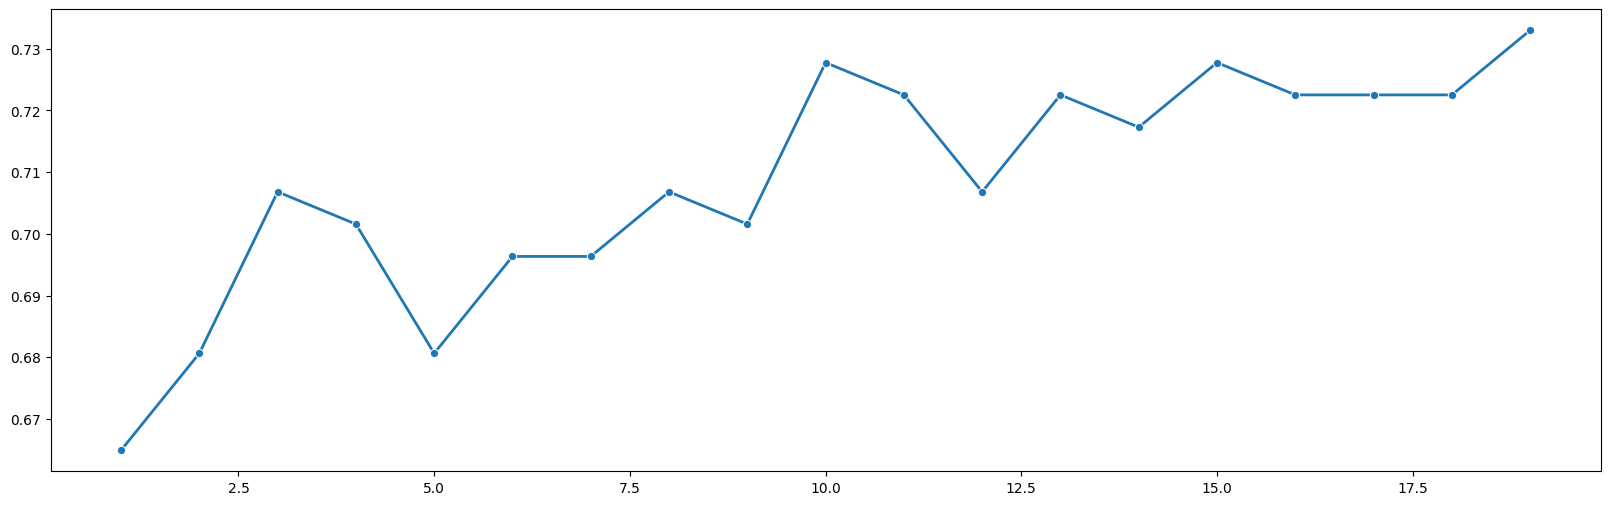

In [69]:
plt.figure(figsize=(20, 6))
sns.lineplot(x = range(1, 20), y=accuracy_scores, lw=2, marker = 'o')
